In [1]:
%matplotlib notebook
import orbipy as op
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
model = op.crtbp3_model()
plotter = op.plotter.from_model(model, length_units='Gm', velocity_units='km/s')
scale = plotter.scaler

In [3]:
df = pickle.load(open('amp_extended.pkl','rb'))
df['new']=1
df_old = pickle.load(open('amp_new.pkl','rb'))
df_old['new']=0
df_all = pd.concat((df.drop('vy0',axis=1),df_old), ignore_index=True)

In [4]:
df_all[['x0','Ax-','Ax+']]-=model.L1

In [5]:
col = list(df_all.columns)
col.remove('new')

In [6]:
df_all[col] = scale(df_all[col],'nd-Mm')

In [7]:
def interactive_map(data, prop_name='Az-', diff=False):
    def onclick(event):
        if event.button == 3:
            ix, iy = event.xdata, event.ydata
            buffer.append([ix, iy])
            ax.plot(ix, iy, 'or')
    
    fig = plt.figure(figsize=(8.4,7))
    ax = fig.add_subplot(111)
    if diff==False:
        color = data[prop_name]
    else:
        color = data['new']
    sc2 = ax.scatter(data['x0'], data['z0'], c=color, s=2.5, cmap='jet')
    ax.axis('equal')
    plt.xlabel('x, $\cdot{}10^6$ km')
    plt.ylabel('z, $\cdot{}10^6$ km')
    if diff==False:
        cbar= plt.colorbar(sc2)
        cbar.set_label(prop_name, rotation=270)
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


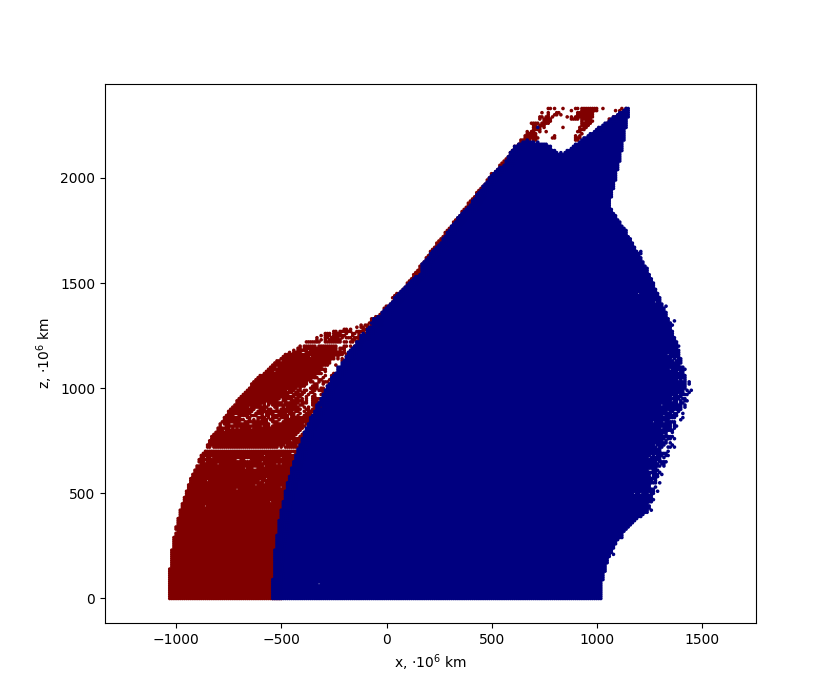

In [8]:
interactive_map(df_all,diff=True)

<IPython.core.display.Javascript object>


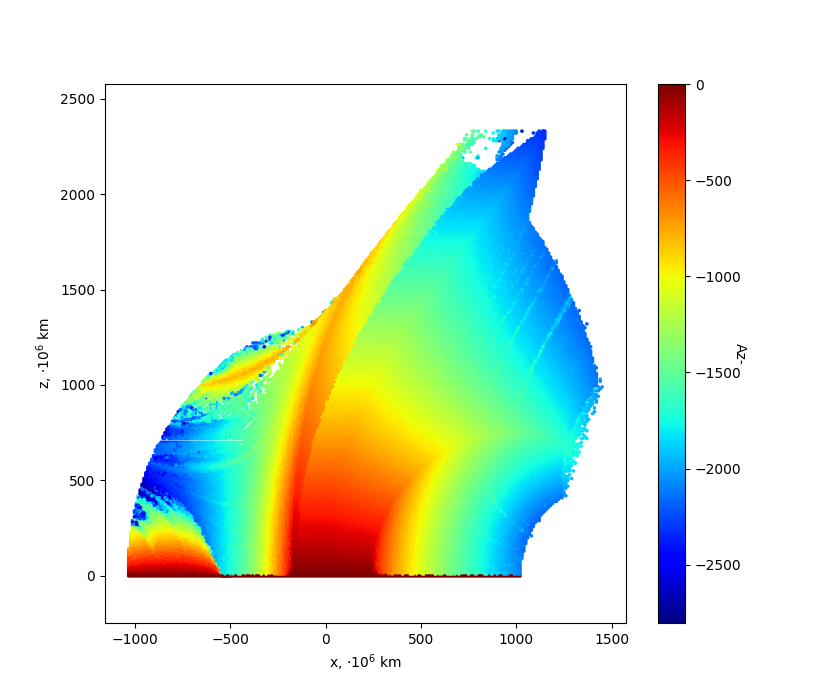

In [260]:
interactive_map(df_all,'Az-')

<IPython.core.display.Javascript object>


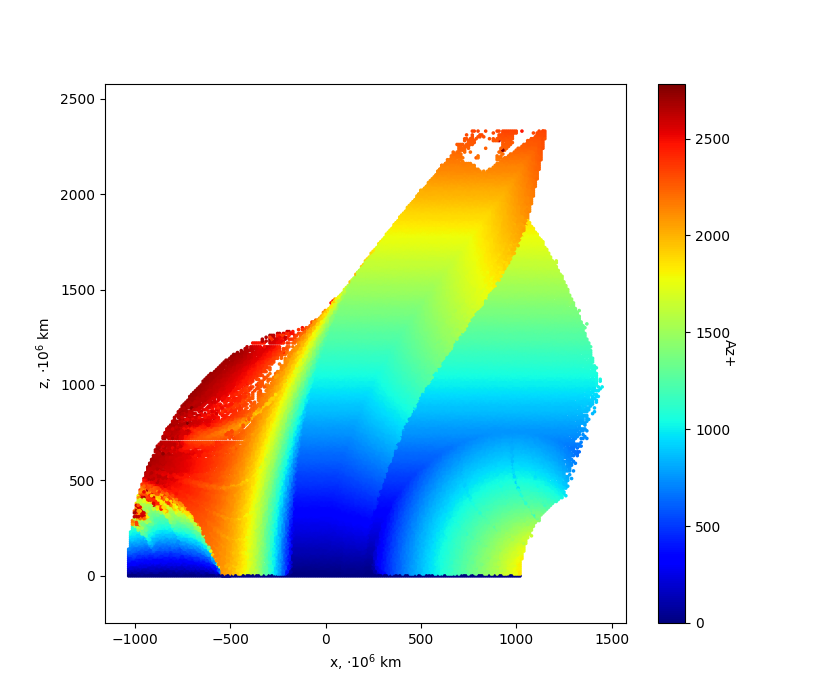

In [261]:
interactive_map(df_all,'Az+')

<IPython.core.display.Javascript object>


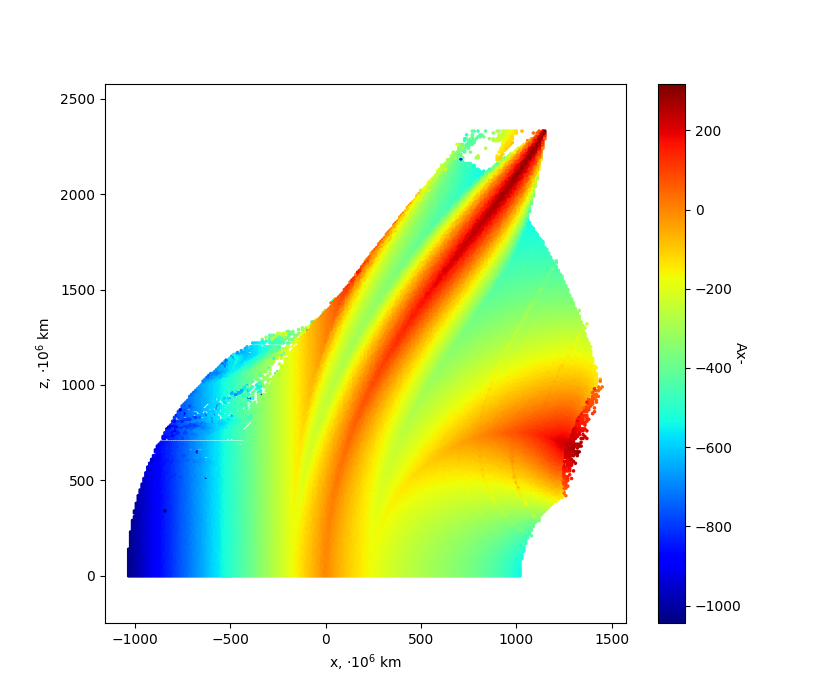

In [262]:
interactive_map(df_all,'Ax-')

<IPython.core.display.Javascript object>


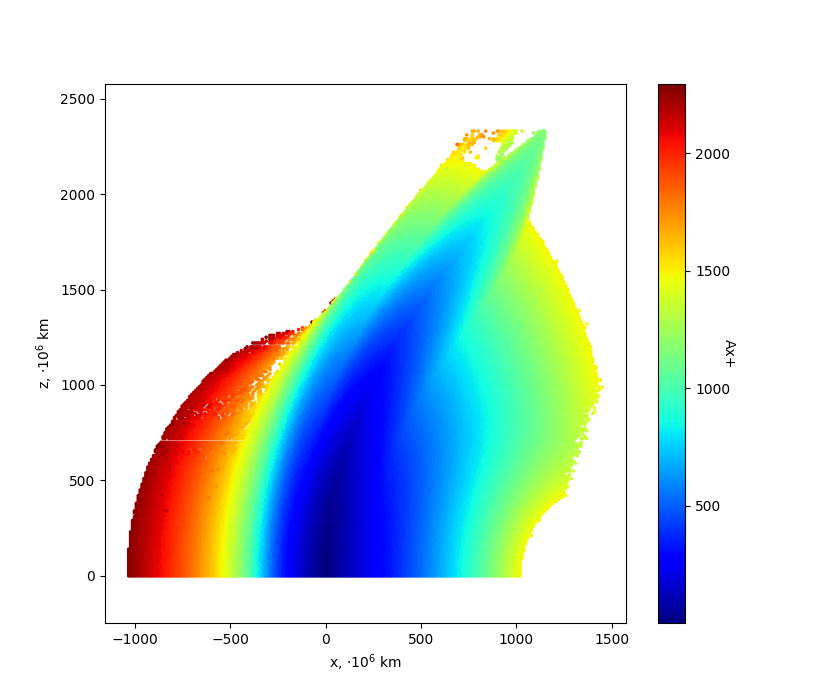

In [263]:
interactive_map(df_all,'Ax+')

<IPython.core.display.Javascript object>


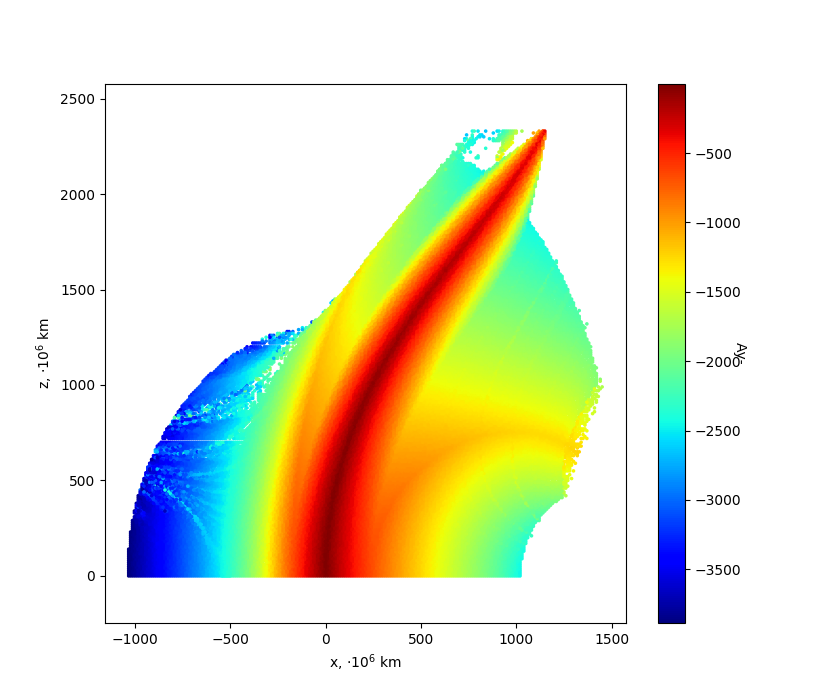

In [264]:
interactive_map(df_all,'Ay-')

<IPython.core.display.Javascript object>


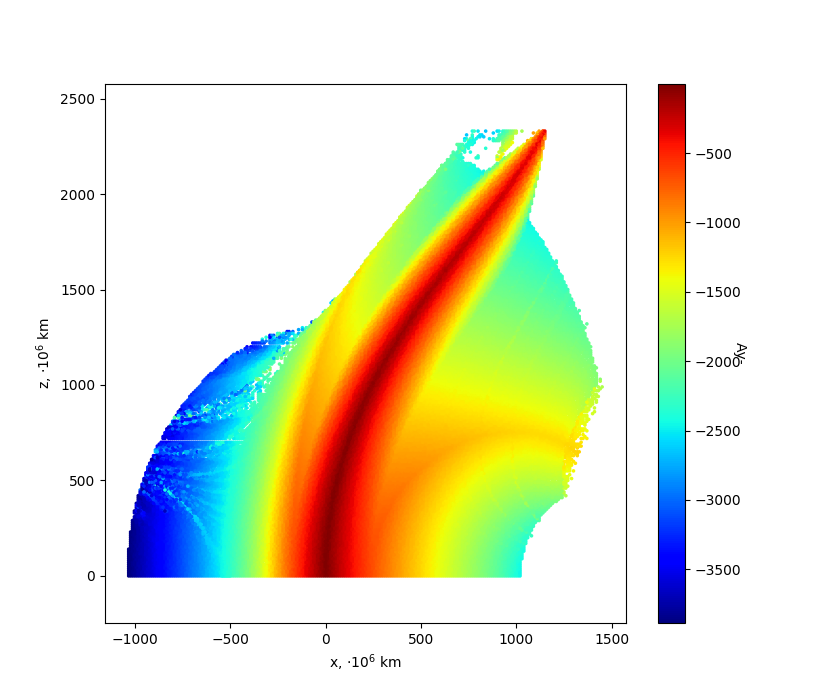

In [265]:
interactive_map(df_all,'Ay-')